Importing the required libraries

In [1]:
from bs4 import BeautifulSoup #To parse the HTML retrieved from the imdb website
import requests #To retrieve HTML from imdb website
import pandas as pd #To store the cleaned dataset as a DataFrame
import seaborn as sns #To make some cool visualizations
import matplotlib.pyplot as plt
import sqlite3 #To store the data in a database
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Base url of the Imdb website
url = 'https://www.imdb.com/chart/top/'

#Paass some headers with the request so that the content returned is in english
headers = {"Accept-Language": "en-US, en;q=0.5"}

#Make a get request and retrieve the HTML file
client = requests.get(url, headers = headers)
html = client.text



In [3]:
#Make a BeautifulSoup object
soup = BeautifulSoup(html, 'html.parser') 

#Initialize some containers to store our data
names = []
rating = []
year = []

#Fetches the movie-names from the <td> tag in which class = id titleColumn
names_container = soup.find_all('td', class_ = 'titleColumn')

#Fetches the Imdb ratings of the movies from the <td> tag in which class = ratingColumn imdbRating
rating_container = soup.find_all('td', class_ = 'ratingColumn imdbRating')

#Loop through the fetched content and store name, rating, and year of release of the movies in the containers
for i,j in zip(names_container, rating_container):
  names.append(i.a.text)
  rating.append(j.text)
  year.append(i.span.text)
  

In [4]:
#Clean the rating list a bit as it contains newline ("\n") characters at the end 
#Store the cleaned rating list in a ratings list
ratings = []
for i in rating:
  i.replace('\n', '')
  i = i.strip()
  try:
    ratings.append(float(i))
  except:
    continue

In [5]:
df = pd.DataFrame(list(zip(names, ratings, year)), columns = ['Movie-Name', 'Imdb Rating', 'Year-of-Release'])

In [6]:
df['Year-of-Release'] = df['Year-of-Release'].map(lambda x: int(x[1:5]))
df.head()

,Movie-Name,Imdb Rating,Year-of-Release
0,The Shawshank Redemption,9.2,1994
1,The Godfather,9.1,1972
2,The Godfather: Part II,9.0,1974
3,The Dark Knight,9.0,2008
4,12 Angry Men,8.9,1957


In [7]:
df = df.sort_values('Year-of-Release')

In [8]:
df.to_csv('Imdb-scrapping.csv')


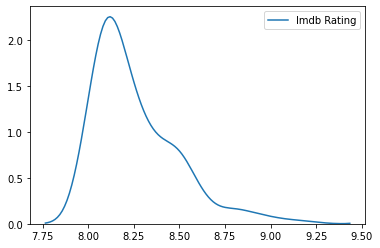

In [9]:
sns.kdeplot(df['Imdb Rating'])

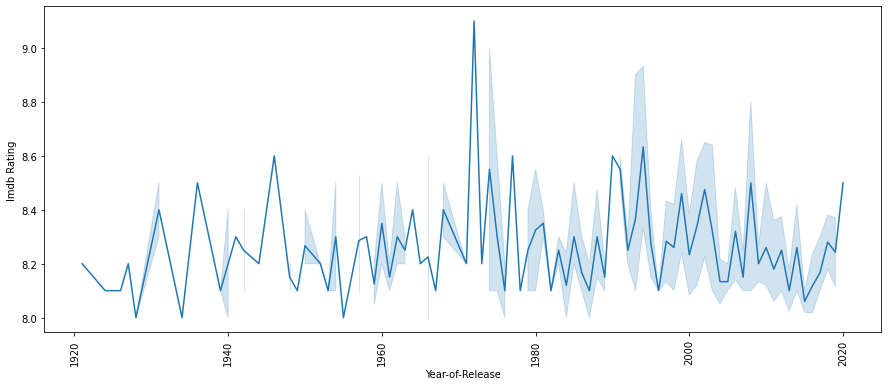

In [10]:
plt.figure(figsize=(15, 6))

plt.xticks(rotation = 90)
sns.lineplot(x = df['Year-of-Release'], y=df['Imdb Rating'] )

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83]),
 <a list of 84 Text major ticklabel objects>)

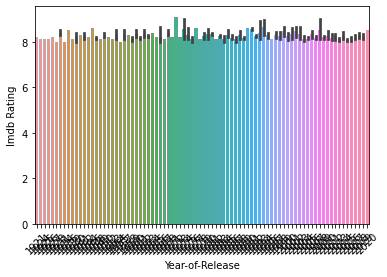

In [11]:
sns.barplot(x = df['Year-of-Release'], y = df['Imdb Rating'].sort_values() )
plt.xticks(rotation = 45)

In [12]:
df.tail()

,Movie-Name,Imdb Rating,Year-of-Release
196,Ford v Ferrari,8.1,2019
94,1917,8.3,2019
57,Joker,8.4,2019
73,Avengers: Endgame,8.3,2019
31,Hamilton,8.5,2020


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83]),
 <a list of 84 Text major ticklabel objects>)

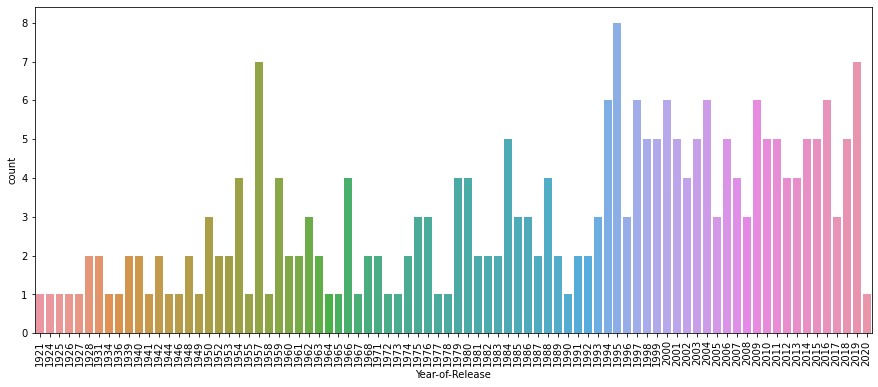

In [18]:
plt.figure(figsize=(15, 6))
sns.countplot(df['Year-of-Release'])
plt.xticks(rotation = 90)

In [14]:
conn = sqlite3.connect('Imdb.sqlite')
cur = conn.cursor()

In [17]:
cur.execute('''CREATE TABLE IF NOT EXISTS IMFbScraping
            (SrNo INTEGER PRIMARY KEY AUTOINCREMENT,
             MovieName TEXT,
             ImdbRating TEXT,
             YearofRelease TEXT)''')

for i,j,k in zip(names, ratings, year):
  cur.execute('INSERT INTO IMFbScraping (MovieName, ImdbRating, YearofRelease) VALUES(?, ?, ?)', (i, j, k))
  
  conn.commit()